In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn import tree

In [2]:
plt.style.use('fivethirtyeight')
df = web.DataReader('GOOG', data_source='yahoo', start='2012-01-01', end='2021-03-31')

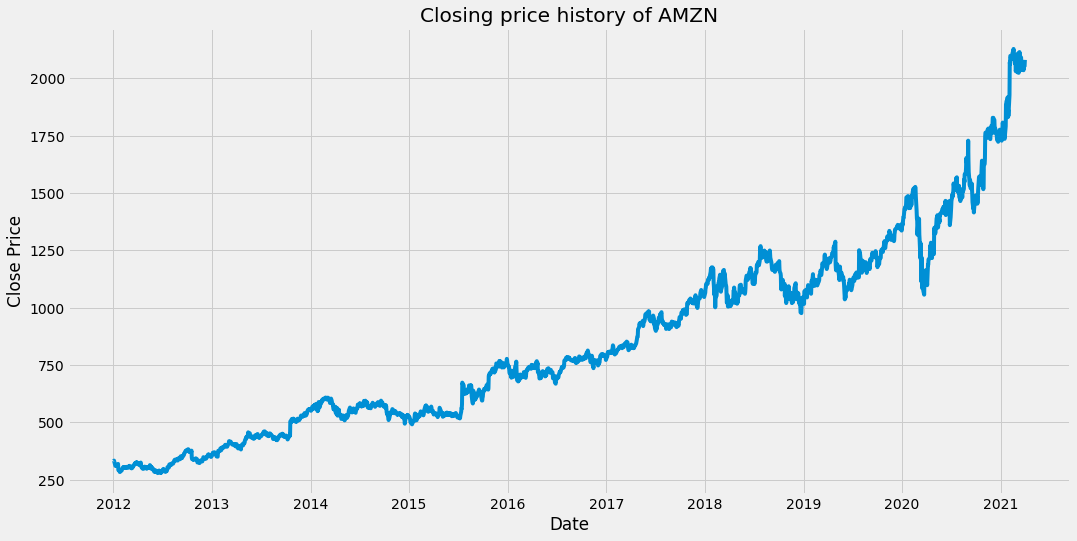

In [3]:
# Vizualize closing price history
plt.figure(figsize=(16,8))
plt.title('Closing price history of AMZN')
plt.plot(df['Close'])
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.show()

In [4]:
# Create a new dataframe with only column and convet it to a numpy array
dataset = df.filter(['Close']).values
train_set = dataset[:round(dataset.shape[0]*0.8)]
test_set = dataset[round(dataset.shape[0]*0.8):]
#print(train_set.shape)
# Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
train_sc = scaler.fit_transform(train_set)
test_sc = scaler.fit_transform(test_set)

In [5]:
#Split the train data into xtrain and ytrain:
#Independant variables
X_train = []
#Dependant variables
y_train = []
# xtrain contain 15 values, which are use for prediction
# y train contain the first value after 15, which is the value that we want to predict
for i in range(15, len(train_sc)):
    # appending the 15 previous stock prices to the list for i
    # we need to specify the rows and simply pick the first and only column
    X_train.append(train_sc[i-15:i, 0])
    # appending the 15th stock price to the list for i
    y_train.append(train_sc[i, 0])

In [6]:
#Split the test data into xtrain and ytrain:
#Independant variables
X_test = []
#Dependant variables
y_test = []
# xtrain contain 15 values, which are use for prediction
# y train contain the first value after 15, which is the value that we want to predict
for i in range(15, len(test_sc)):
    # appending the 15 previous stock prices to the list for i
    # we need to specify the rows and simply pick the first and only column
    X_test.append(test_sc[i-15:i, 0])
    # appending the 15th stock price to the list for i
    y_test.append(test_sc[i, 0])

In [7]:
#--------------------- Model Define --------------------#
reg = tree.DecisionTreeRegressor()
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [9]:
y_pred2 = reg.predict(X_test)
print(sum(mae(y_test,y_pred2)))

0.02283017985556922
